<a href="https://colab.research.google.com/github/r4mir3zzz/proyectoNoSQL/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/KNN.csv')

In [ ]:
df.head()

,_id,Delito,Fecha,Edad,Provincia,Victima
0,65d8212abfcb20524a9dcda6,ASALTO,2023-01-13T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
1,65d8212abfcb20524a9dcda7,ASALTO,2023-01-18T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
2,65d8212abfcb20524a9dcda8,ASALTO,2023-01-21T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
3,65d8212abfcb20524a9dcda9,ASALTO,2023-02-04T00:00:00.000Z,Mayor de edad,ALAJUELA,EDIFICACION
4,65d8212abfcb20524a9dcdaa,ASALTO,2023-02-06T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA


In [ ]:
df.groupby("Delito").size()

Delito
ASALTO               8488
HOMICIDIO             357
HURTO                9933
ROBO                  735
ROBO DE VEHICULO      324
TACHA DE VEHICULO     133
dtype: int64

In [ ]:
df = df.drop('_id', axis = 1)
df.to_csv('analisis_sin_id.csv')

In [ ]:
df = pd.read_csv('/content/analisis_sin_id.csv')

In [ ]:
df.head()

,Unnamed: 0,Delito,Fecha,Edad,Provincia,Victima
0,0,ASALTO,2023-01-13T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
1,1,ASALTO,2023-01-18T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
2,2,ASALTO,2023-01-21T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA
3,3,ASALTO,2023-02-04T00:00:00.000Z,Mayor de edad,ALAJUELA,EDIFICACION
4,4,ASALTO,2023-02-06T00:00:00.000Z,Mayor de edad,ALAJUELA,PERSONA


In [ ]:
columnas_especificas = ["Delito","Fecha", "Provincia","Victima","Edad"]

In [ ]:
le = LabelEncoder()

In [ ]:
for col in columnas_especificas:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.to_csv("encoded_file.csv", index=False)

In [ ]:
encoded_df = pd.read_csv("encoded_file.csv")

In [ ]:
df.head()

,Unnamed: 0,Delito,Fecha,Edad,Provincia,Victima
0,0,0,12,2,0,2
1,1,0,17,2,0,2
2,2,0,20,2,0,2
3,3,0,34,2,0,0
4,4,0,36,2,0,2


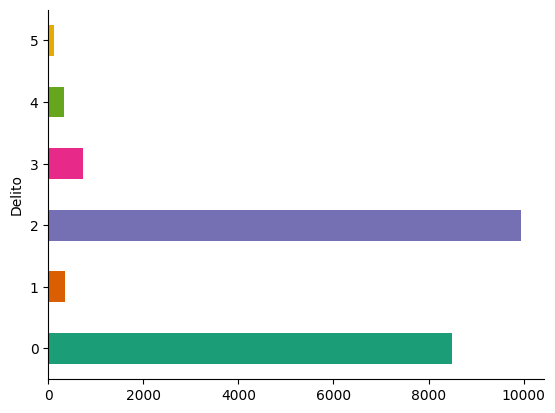

In [ ]:
# @title Delito

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Delito').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.corr()

,Unnamed: 0,Delito,Fecha,Edad,Provincia,Victima
Unnamed: 0,1.000000,0.356081,0.078081,-0.015299,0.363801,0.025308
Delito,0.356081,1.000000,0.022797,-0.080408,-0.136531,0.065241
Fecha,0.078081,0.022797,1.000000,0.008106,0.024183,0.035676
Edad,-0.015299,-0.080408,0.008106,1.000000,0.014112,0.009321
Provincia,0.363801,-0.136531,0.024183,0.014112,1.000000,-0.037790
Victima,0.025308,0.065241,0.035676,0.009321,-0.037790,1.000000


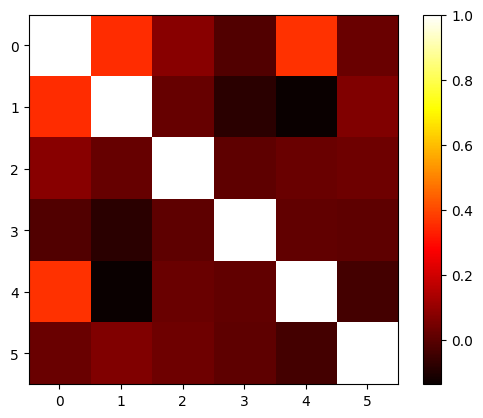

In [ ]:
plt.imshow(df.corr(), cmap='hot')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Delito", axis=1)
y = df["Delito"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.predict(X_test)

array([0, 2, 2, ..., 2, 2, 0])

In [ ]:
accuracy_score(y_test, knn.predict(X_test))

0.9411617426139208

In [ ]:
# Lista para almacenar las precisiones
accuracies = []

In [ ]:
# Probamos diferentes valores de k
k_values = range(1, 5)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

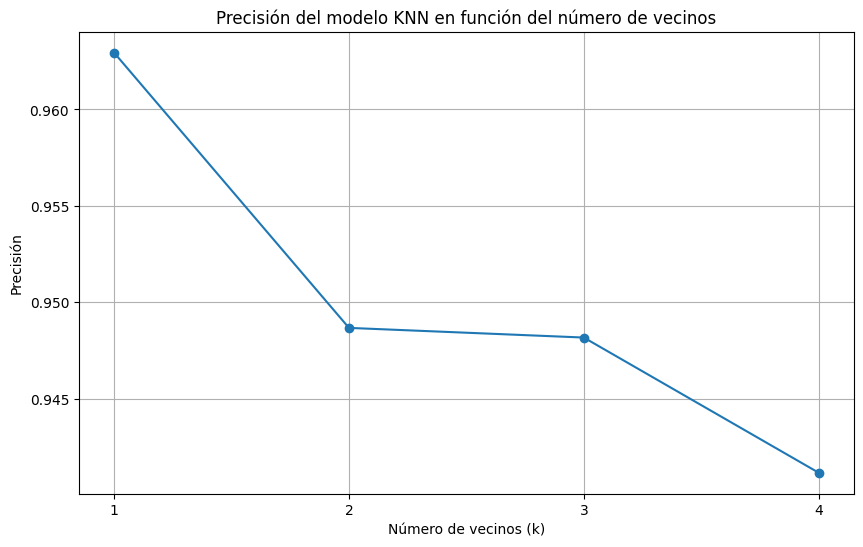

In [ ]:
# Graficamos las precisiones en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Precisión del modelo KNN en función del número de vecinos')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()
